**Import all necessary library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor





**Import Dataset**

In [ ]:
df=pd.read_csv('/content/data.csv') # Import dataset

In [ ]:
df.head() # Checking the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info() # checking the imformation of datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.shape # Checking the number of rows and columns in the dataset

(506, 14)

In [ ]:
df.describe() #Statistical Summary

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

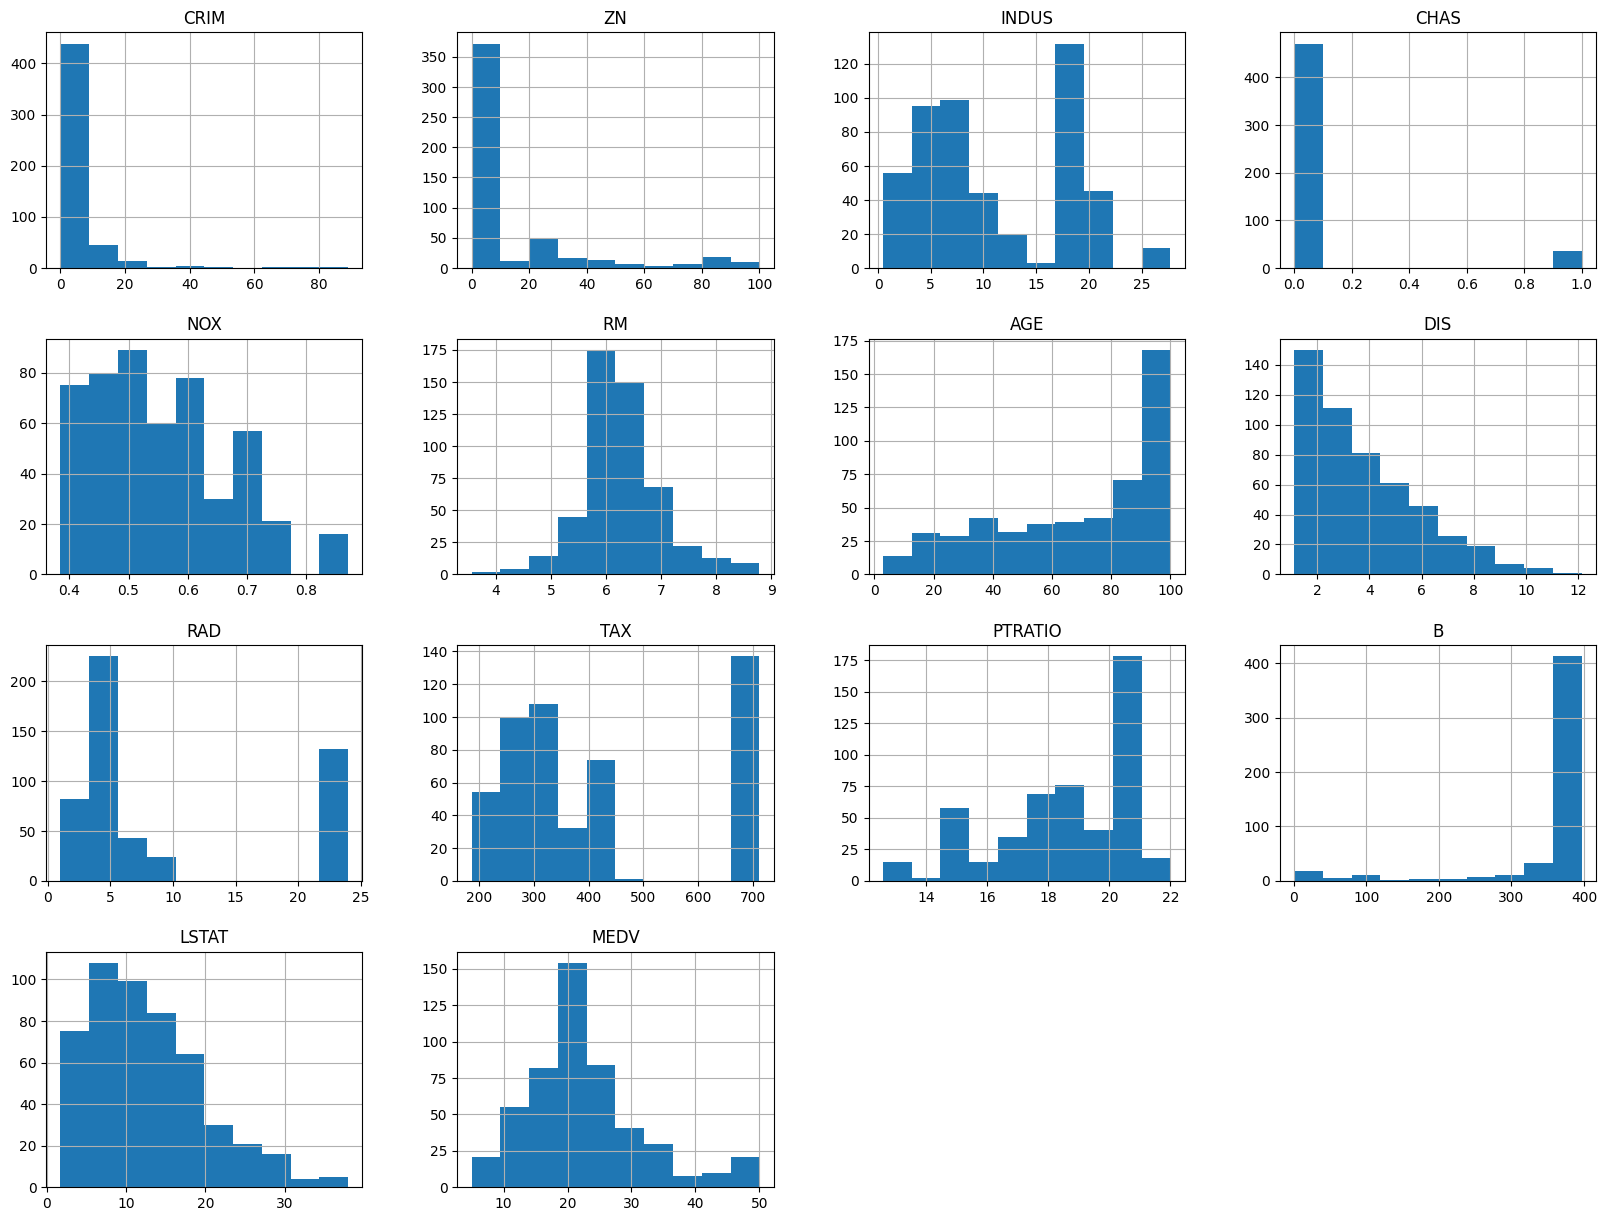

In [ ]:
df.hist(figsize=(20,15)) # Histograms for numerical columns

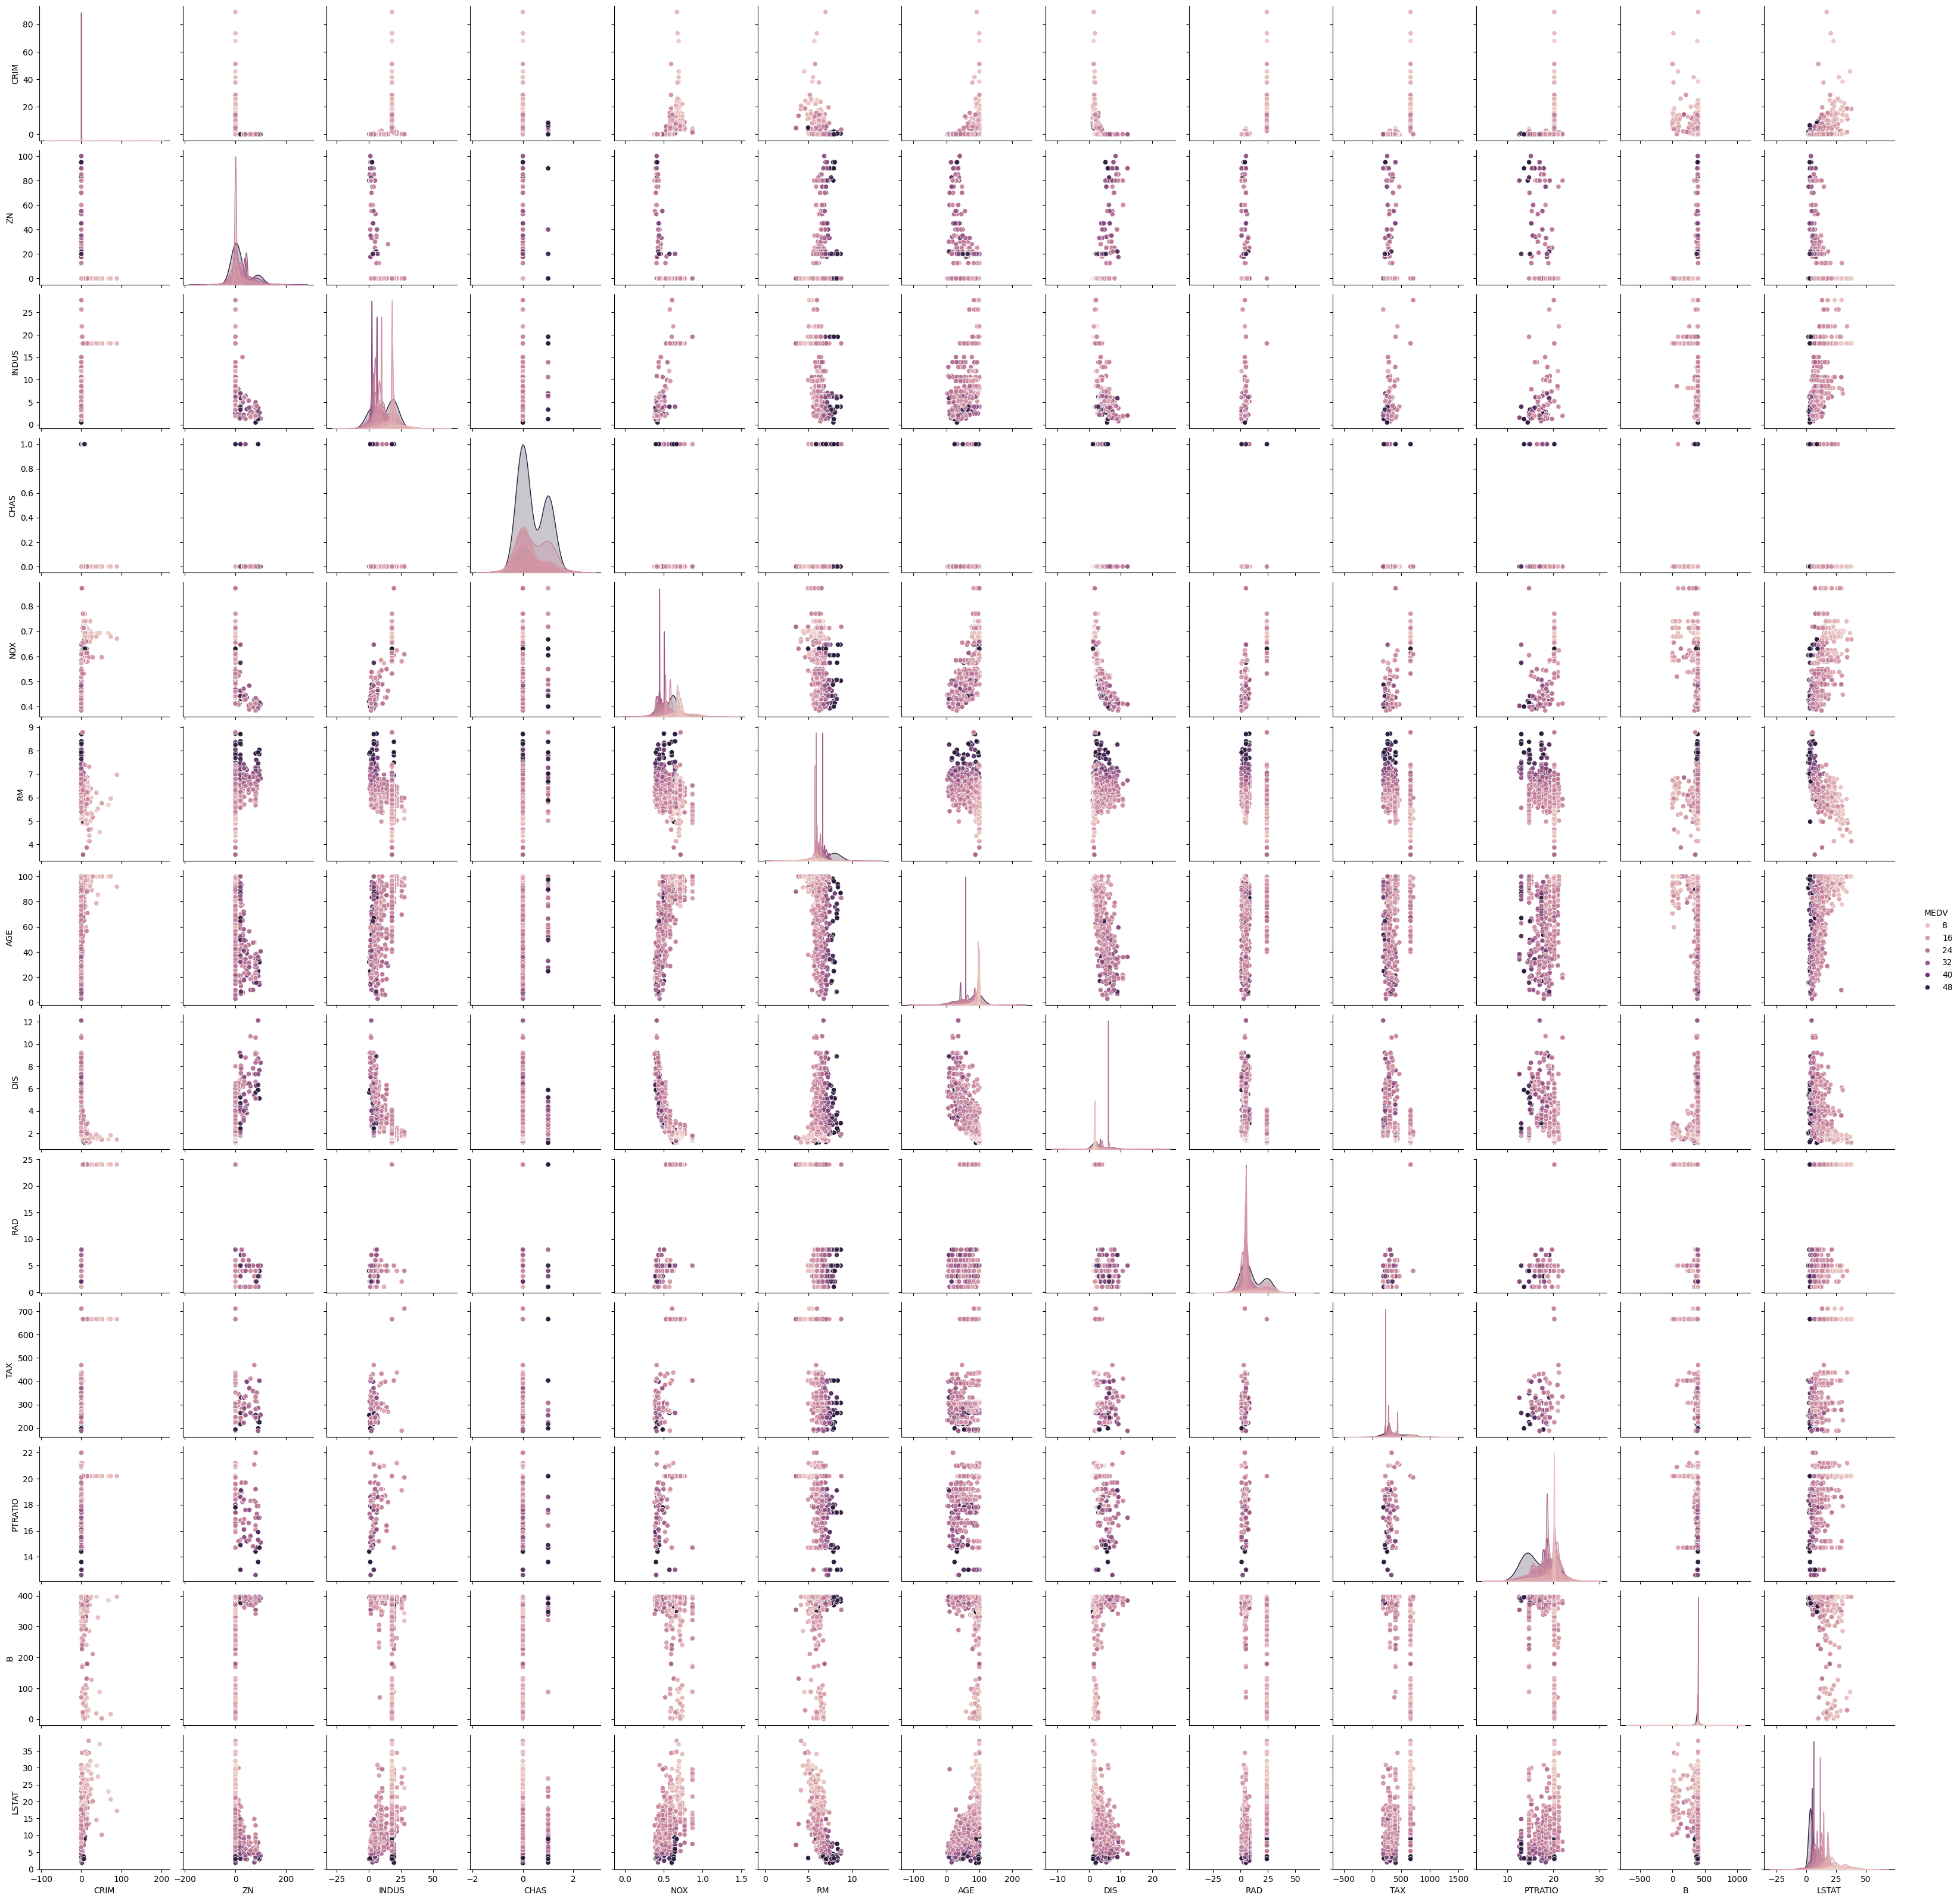

In [ ]:
sns.pairplot(df, hue='MEDV') # Pairwise relationship among all numerical variables

In [ ]:
df.isnull().sum() # Checking null values

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,5
AGE,0
DIS,0
RAD,0
TAX,0


<Axes: >

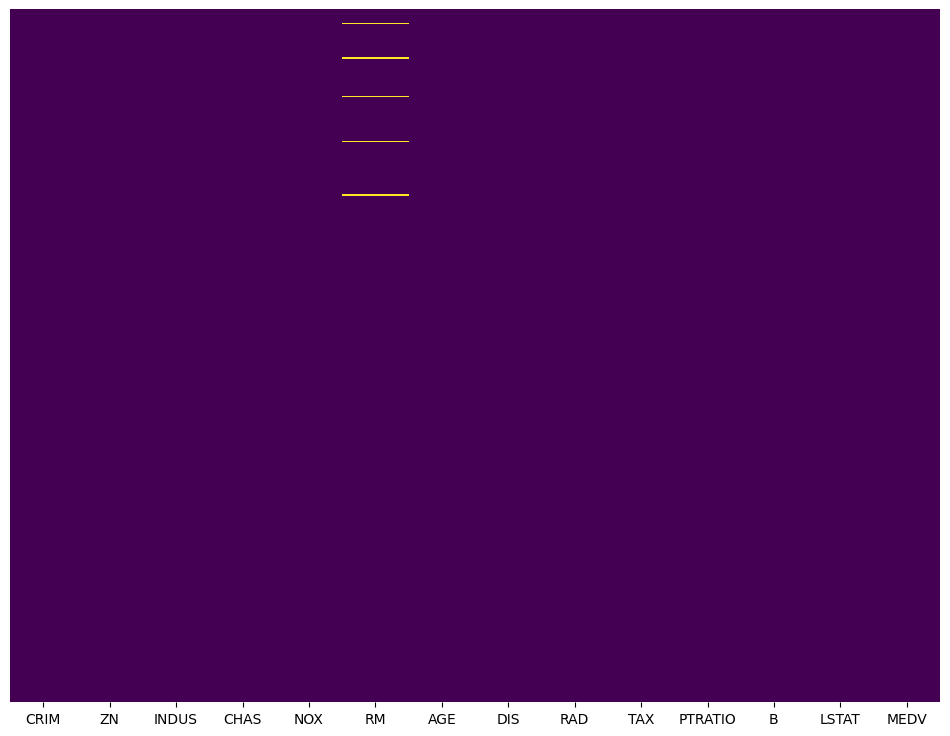

In [ ]:
matplotlib.rcParams['figure.figsize']=[12,9] # Checking the missing values among variables
sns.heatmap(df.isnull(),cbar=False, cmap='viridis', yticklabels=False)


In [ ]:
df['RM'] = df['RM'].fillna(df['RM'].mean()) # Missing value imputation by mean

<Axes: >

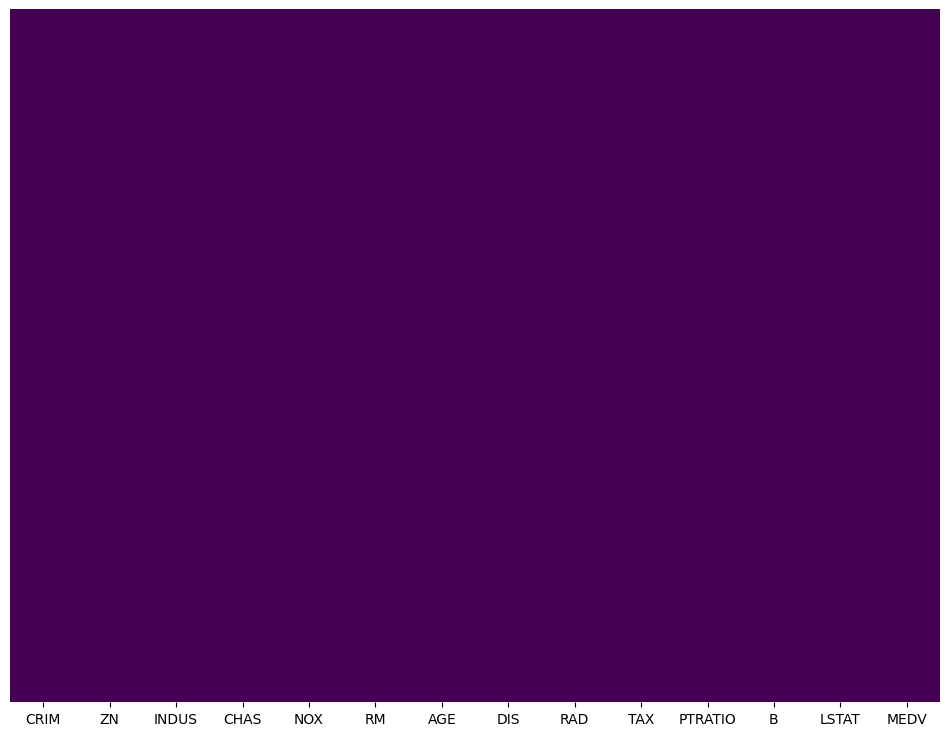

In [ ]:
matplotlib.rcParams['figure.figsize']=[12,9]
sns.heatmap(df.isnull(),cbar=False, cmap='viridis', yticklabels=False) # After missing value imputation checking the dataset by heatmap

In [ ]:
correlation_matrix = df.corr() # Check the coorelation among variables
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219261,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310847,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.392052,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091434,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302051,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219261,0.310847,-0.392052,0.091434,-0.302051,1.000000,-0.239632,0.202268,-0.210353,-0.292178,-0.356065,0.127998,-0.614526,0.695375
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.239632,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.202268,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210353,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292178,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

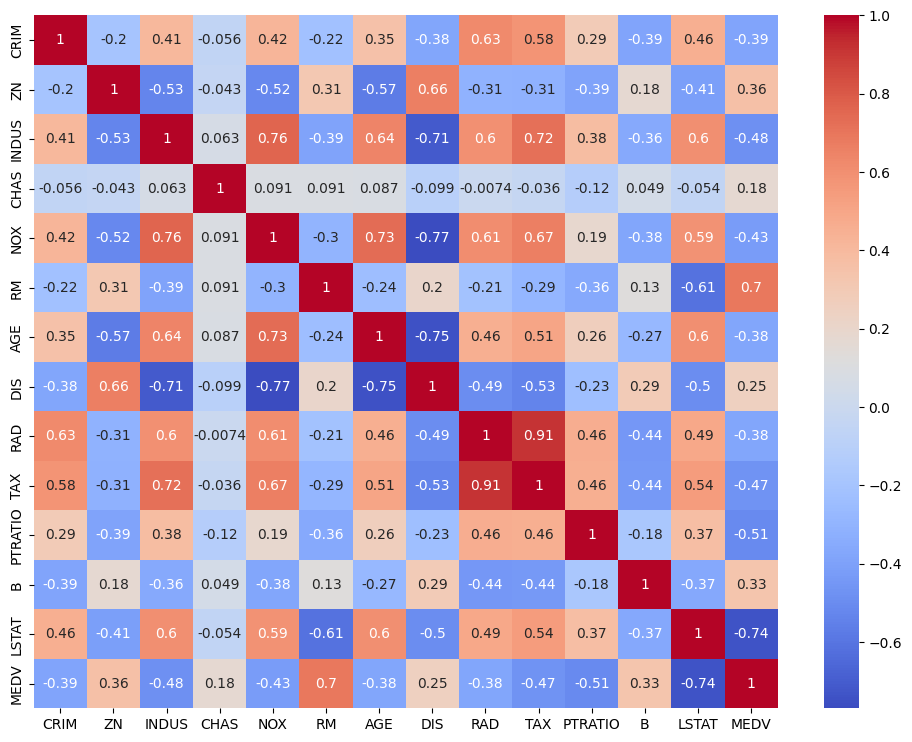

In [ ]:
matplotlib.rcParams['figure.figsize']=[12,9]
sns.heatmap(df.corr(),annot=True,cmap='coolwarm') # checking the coorelation heatmap

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

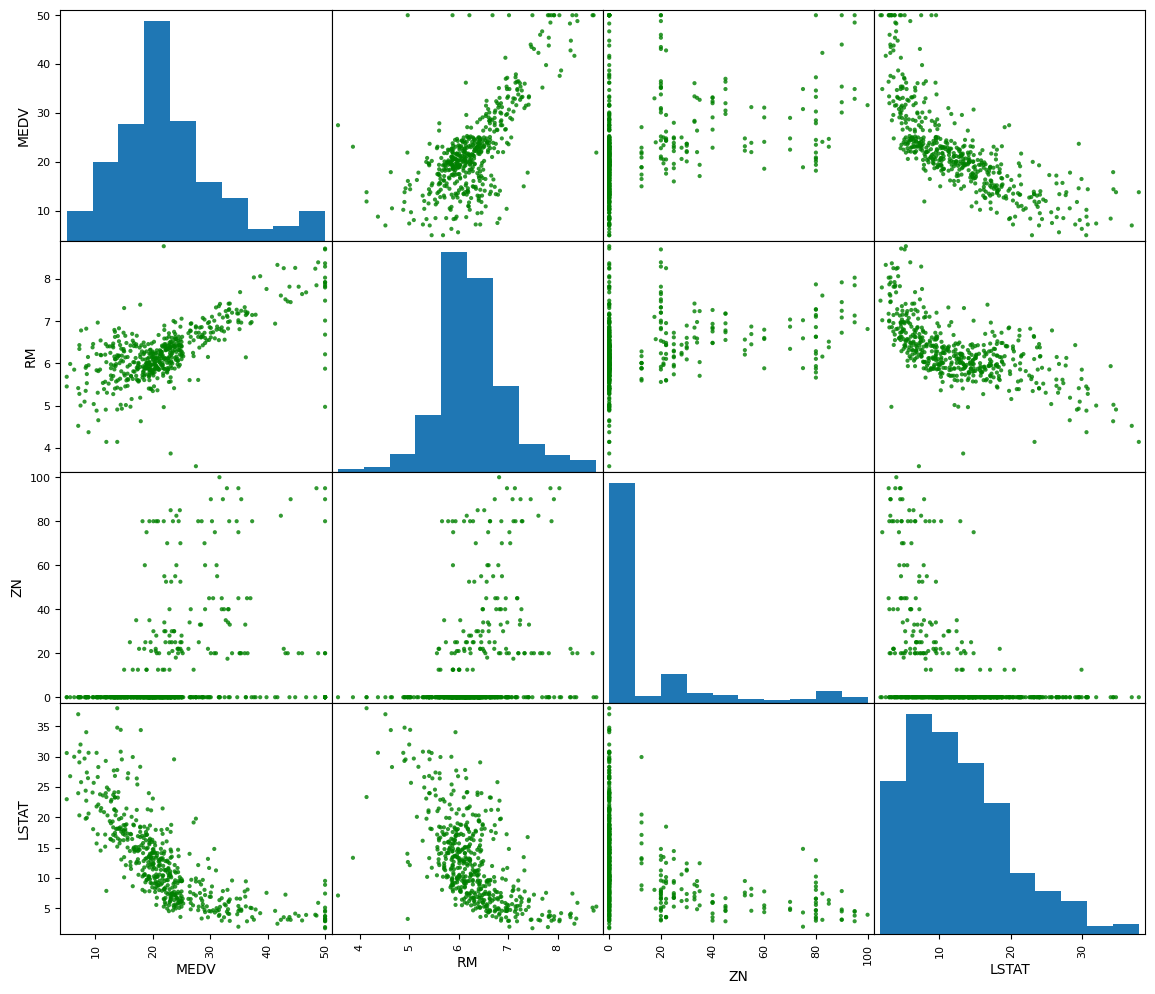

In [ ]:
scatter_matrix(df[['MEDV','RM','ZN','LSTAT']], figsize=(14, 12),alpha=0.8,color='green') # Plot scatter matrix for all numeric features
plt.show()  # Display the plot

In [ ]:
X2 = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']] # Select the independent variables (features) from the dataframe


# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns

# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif2_data)

    Feature        VIF
0      CRIM   2.100389
1        ZN   2.844771
2     INDUS  14.498963
3      CHAS   1.152980
4       NOX  73.898156
5        RM  77.932313
6       AGE  21.380283
7       DIS  14.678326
8       RAD  15.172124
9       TAX  61.228527
10  PTRATIO  85.168570
11        B  20.106578
12    LSTAT  11.105764


/tmp/ipython-input-3608477695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')


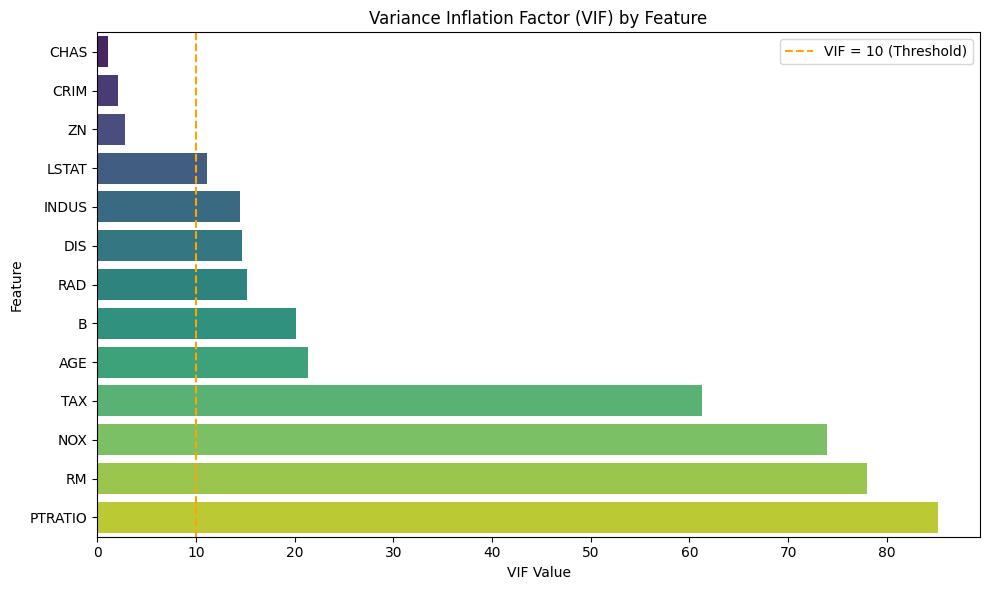

In [ ]:
# Sort for a clearer plot
vif_data = vif2_data.sort_values(by='VIF', ascending=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='VIF', y='Feature', data=vif_data, palette='viridis')
plt.axvline(10, color='orange', linestyle='--', label='VIF = 10 (Threshold)')
plt.title('Variance Inflation Factor (VIF) by Feature')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:

X = df.drop(columns=['MEDV']) # Sepate features
y = df['MEDV'] # Target Variables


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Standardized features
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)


In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03
26,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307,21.0,376.88,14.81
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,20.9,395.24,12.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [ ]:
y_train

,MEDV
478,14.6
26,16.6
7,27.1
492,20.1
108,19.8
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [ ]:
X_train.value_counts()

,,,,,,,,,,,,,count
CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,
88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,1
0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,1
0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23,1
15.86030,0.0,18.10,0,0.679,5.896,95.4,1.9096,24,666,20.2,7.68,24.39,1
15.28800,0.0,18.10,0,0.671,6.649,93.3,1.3449,24,666,20.2,363.02,23.24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,1
0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11,1
0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,1


In [ ]:
X_train_sm = sm.add_constant(X_train) # Add a constant to get an intercept
lr = sm.OLS(y_train, X_train_sm).fit() # Fit the regression line line by using OLS


In [ ]:
print(lr.summary()) # Performing a summary operation lists out all different parameters of the regression line fitted

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     70.68
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           2.04e-86
Time:                        05:14:04   Log-Likelihood:                -1012.7
No. Observations:                 339   AIC:                             2053.
Df Residuals:                     325   BIC:                             2107.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4002      6.283      5.316      0.0

The initial multiple linear regression (OLS) model achieved a satisfactory coefficient of determination (R² ≈ 0.73), indicating that approximately 73% of the variation in house prices (MEDV) can be explained by the selected independent variables.
However, the Variance Inflation Factor (VIF) analysis revealed severe multicollinearity among several predictors — particularly NOX, RM, TAX, and PTRATIO — with VIF values exceeding 60.
This suggests that these variables are highly correlated, which violates one of the key assumptions of the OLS regression model and leads to unstable and unreliable coefficient estimates.

To address this issue, Ridge and Lasso regression models were applied.
Ridge regression (L2 regularization) successfully stabilized the coefficient estimates by shrinking correlated variable effects, while Lasso regression (L1 regularization) automatically eliminated less important predictors.

In [ ]:

X = df.drop(columns=['MEDV'])
X = sm.add_constant(X)     # adds intercept term
Y = df['MEDV']

# 2️⃣ Fit OLS model and store results
results = sm.OLS(Y, X).fit()   # <-- this line creates the 'results' object

# 3️⃣ Predict
Y_pred = results.predict(X)
residuals = Y - Y_pred


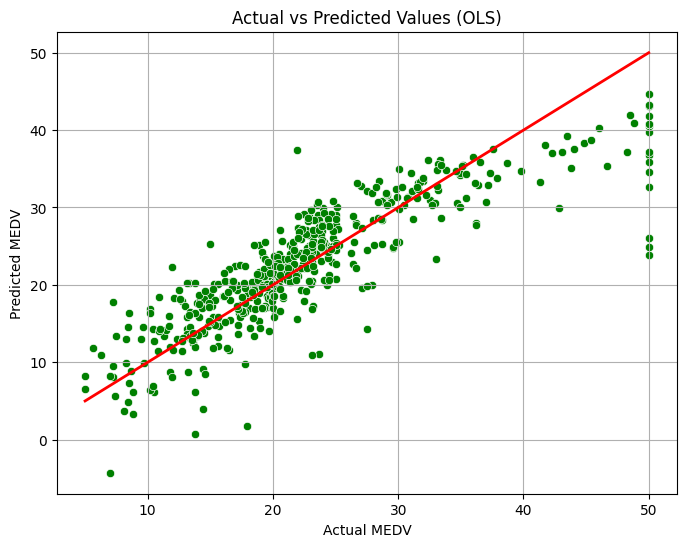

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y, y=Y_pred, color='green')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Values (OLS)")
plt.grid(True)
plt.show()


R²: 0.725, MAE: 3.158, RMSE: 4.561


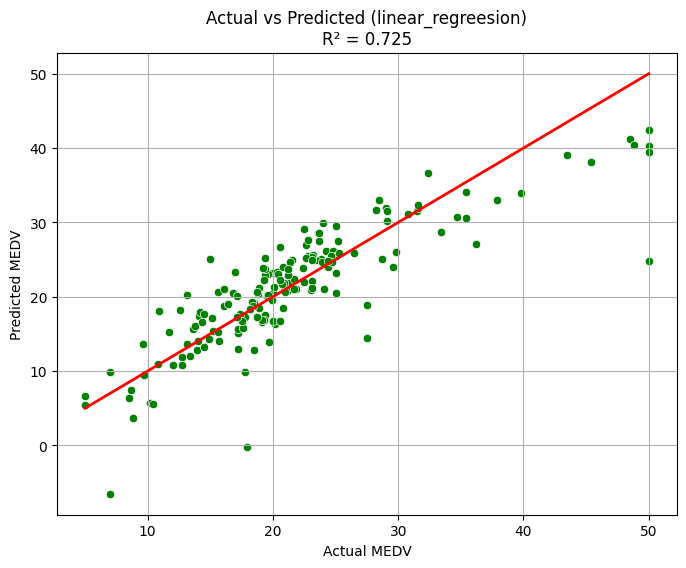

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# 3. Predict on SAME test set
y_pred = lr.predict(X_test)

# 4. Evaluate on SAME data used for plot
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

# 5. Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title(f"Actual vs Predicted (linear_regreesion)\nR² = {r2:.3f}")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)
plt.show()

R²: 0.709, MAE: 3.241, RMSE: 4.696


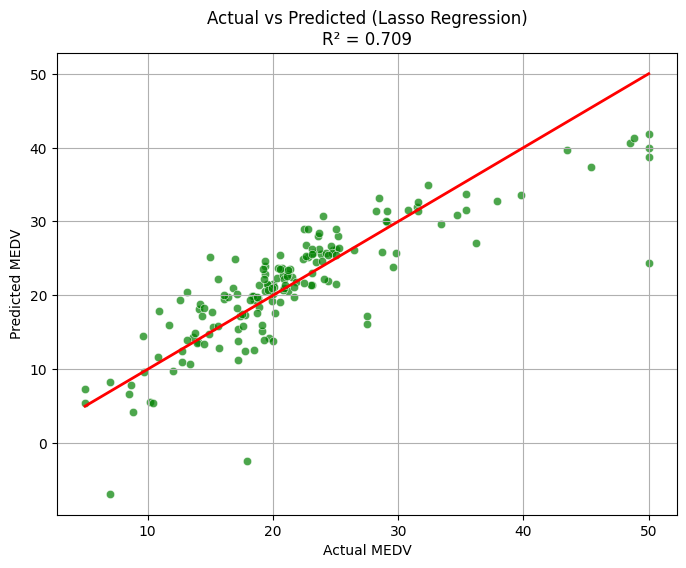

In [ ]:
lasso = Lasso(alpha=0.1, random_state=42)  # you can tune alpha (0.01, 0.1, 1.0)
lasso.fit(X_train, y_train)

# Predict on test set
y_pred = lasso.predict(X_test)

#  Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

#  Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title(f"Actual vs Predicted (Lasso Regression)\nR² = {r2:.3f}")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)
plt.show()


R²: 0.719, MAE: 3.161, RMSE: 4.608


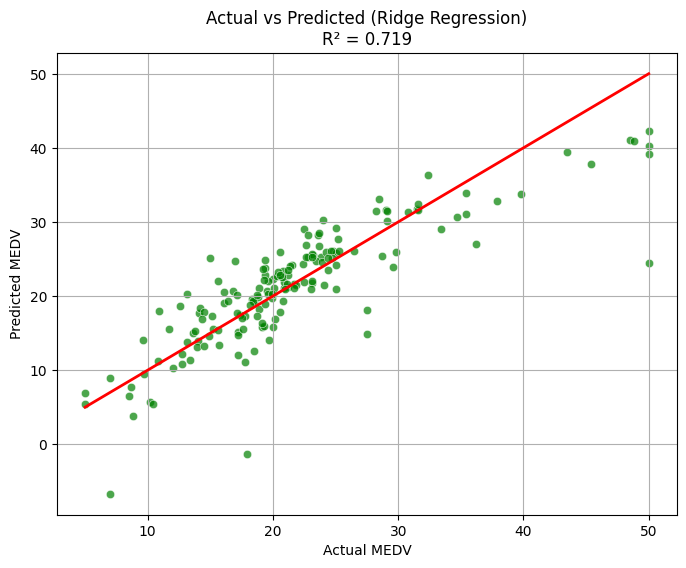

In [ ]:
ridge = Ridge(alpha=1.0)   # try 0.1, 1.0, 10.0, etc.
ridge.fit(X_train, y_train)

# 4) Predict on the SAME test set
y_pred = ridge.predict(X_test)

# 5) Evaluate
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R²: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

# 6) Plot Actual vs Predicted (same style)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='Green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title(f"Actual vs Predicted (Ridge Regression)\nR² = {r2:.3f}")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)
plt.show()

R²: 0.740, MAE: 3.078, RMSE: 4.432


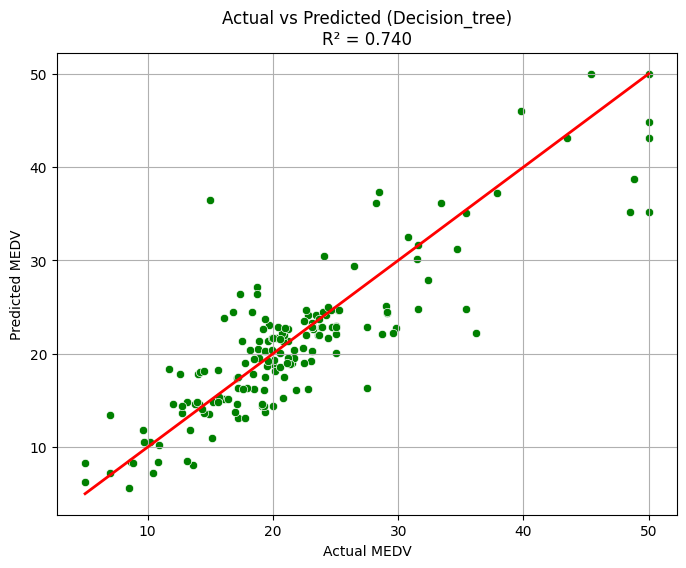

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# 3. Predict on SAME test set
y_pred = dt.predict(X_test)

# 4. Evaluate on SAME data used for plot
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

# 5. Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title(f"Actual vs Predicted (Decision_tree)\nR² = {r2:.3f}")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)
plt.show()

R²: 0.858, MAE: 2.246, RMSE: 3.282


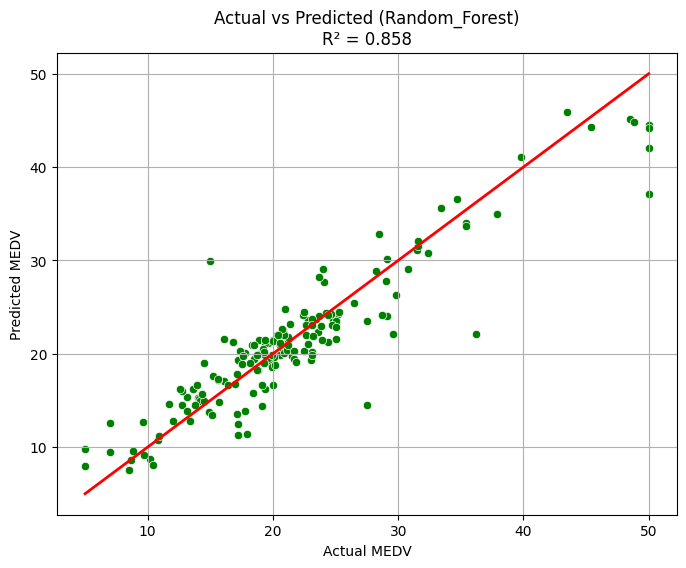

In [ ]:
rt = RandomForestRegressor(random_state=42)
rt.fit(X_train, y_train)

# 3. Predict on SAME test set
y_pred = rt.predict(X_test)

# 4. Evaluate on SAME data used for plot
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

# 5. Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title(f"Actual vs Predicted (Random_Forest)\nR² = {r2:.3f}")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)
plt.show()

R²: 0.274, MAE: 4.779, RMSE: 7.414


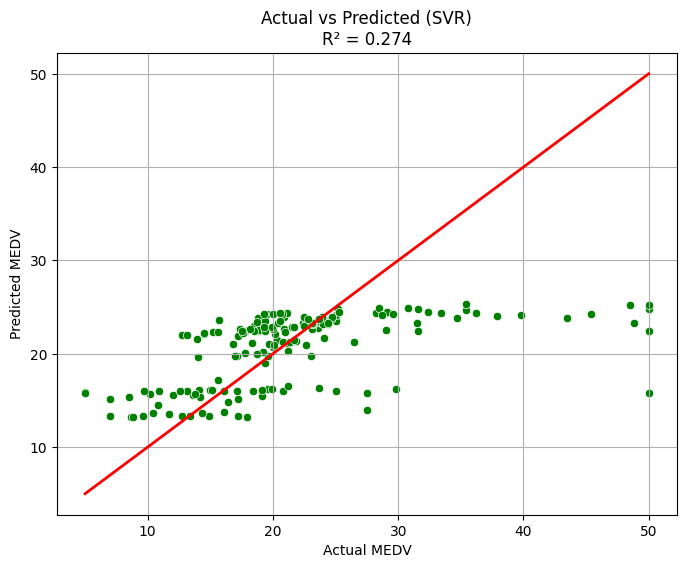

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)

# 3. Predict on SAME test set
y_pred = svr.predict(X_test)

# 4. Evaluate on SAME data used for plot
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

# 5. Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title(f"Actual vs Predicted (SVR)\nR² = {r2:.3f}")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)
plt.show()

R²: 0.887, MAE: 2.009, RMSE: 2.920


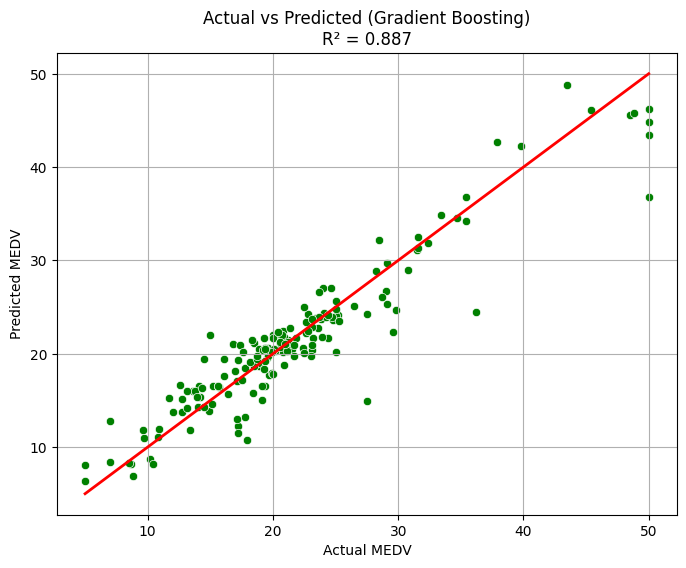

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# 3. Predict on SAME test set
y_pred = gbr.predict(X_test)

# 4. Evaluate on SAME data used for plot
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

# 5. Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title(f"Actual vs Predicted (Gradient Boosting)\nR² = {r2:.3f}")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.grid(True)
plt.show()

In [ ]:
models = {
    'Linear Regression': LinearRegression(), 'Leasso Regression':Lasso(),'Ridge Regresssion':Ridge(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=5),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=200),
    'SVM': SVR(kernel='rbf', C=100, epsilon=0.1),
    'XGBoost': GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1)
}

# --- Train, predict, and evaluate ---
results = []
for name, model in models.items():
    # Use scaled data for SVR, unscaled for others
    if name == 'SVM':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append([name, r2, mae, rmse])

# --- Store results ---
results_df = pd.DataFrame(results, columns=['Model', 'R²', 'MAE', 'RMSE'])
print("\n📊 Model Performance Comparison:")
print(results_df)


📊 Model Performance Comparison:
               Model        R²       MAE      RMSE
0  Linear Regression  0.725078  3.158446  4.561327
1  Leasso Regression  0.664229  3.668768  5.040894
2  Ridge Regresssion  0.719438  3.161399  4.607877
3      Decision Tree  0.795860  2.681769  3.930526
4      Random Forest  0.866926  2.162147  3.173457
5                SVM  0.511723  3.842241  6.078821
6            XGBoost  0.889007  1.979565  2.898233


/tmp/ipython-input-239041199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')


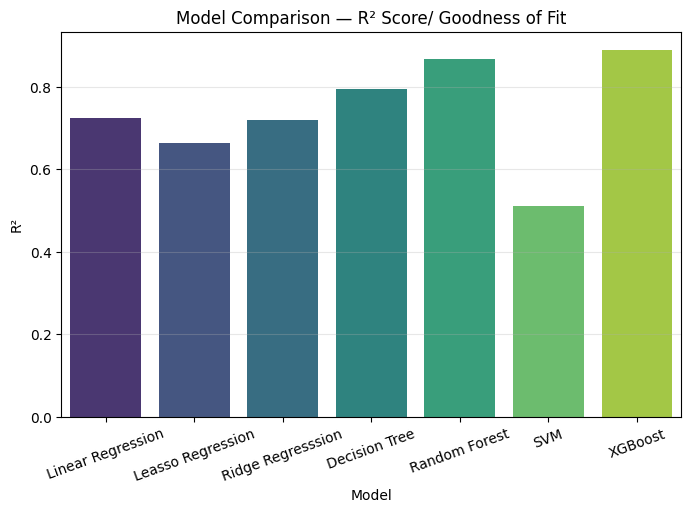

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')
plt.title('Model Comparison — R² Score/ Goodness of Fit')
plt.ylabel('R²')
plt.xticks(rotation=20)
plt.grid(True, axis='y', alpha=0.3)
plt.show()


/tmp/ipython-input-281380220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_df, palette='mako')


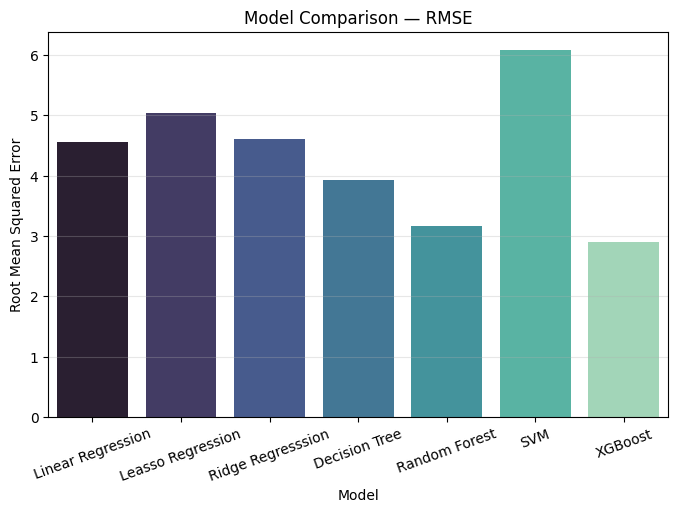

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='RMSE', data=results_df, palette='mako')
plt.title('Model Comparison — RMSE')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=20)
plt.grid(True, axis='y', alpha=0.3)
plt.show()


/tmp/ipython-input-570538407.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df, palette='crest')


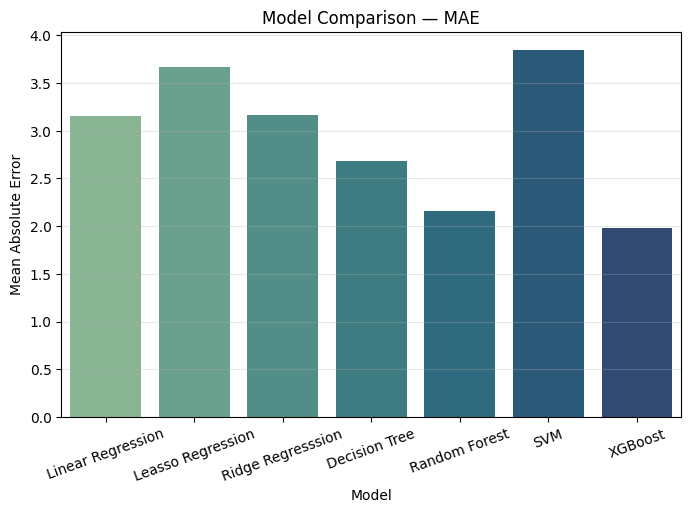

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='MAE', data=results_df, palette='crest')
plt.title('Model Comparison — MAE')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=20)
plt.grid(True, axis='y', alpha=0.3)
plt.show()


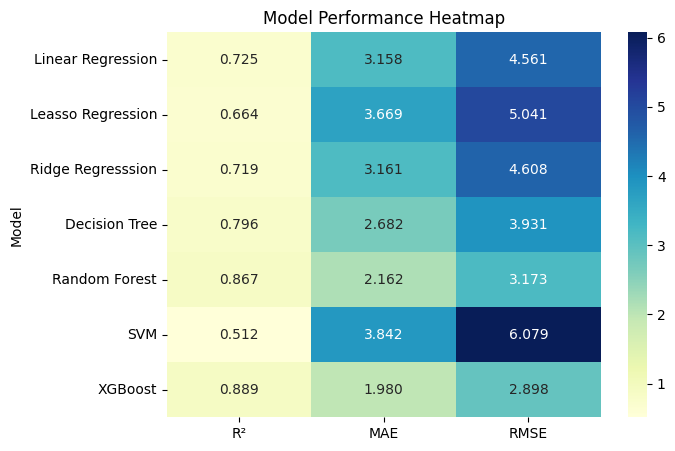

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(results_df.set_index('Model')[['R²', 'MAE', 'RMSE']], annot=True, fmt=".3f", cmap='YlGnBu')
plt.title('Model Performance Heatmap')
plt.show()
